In [ ]:
# Peter Nelson 12/1/20
# Three different regresion models are fit to predict values of lag using the determined data before being evaluated.

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline  

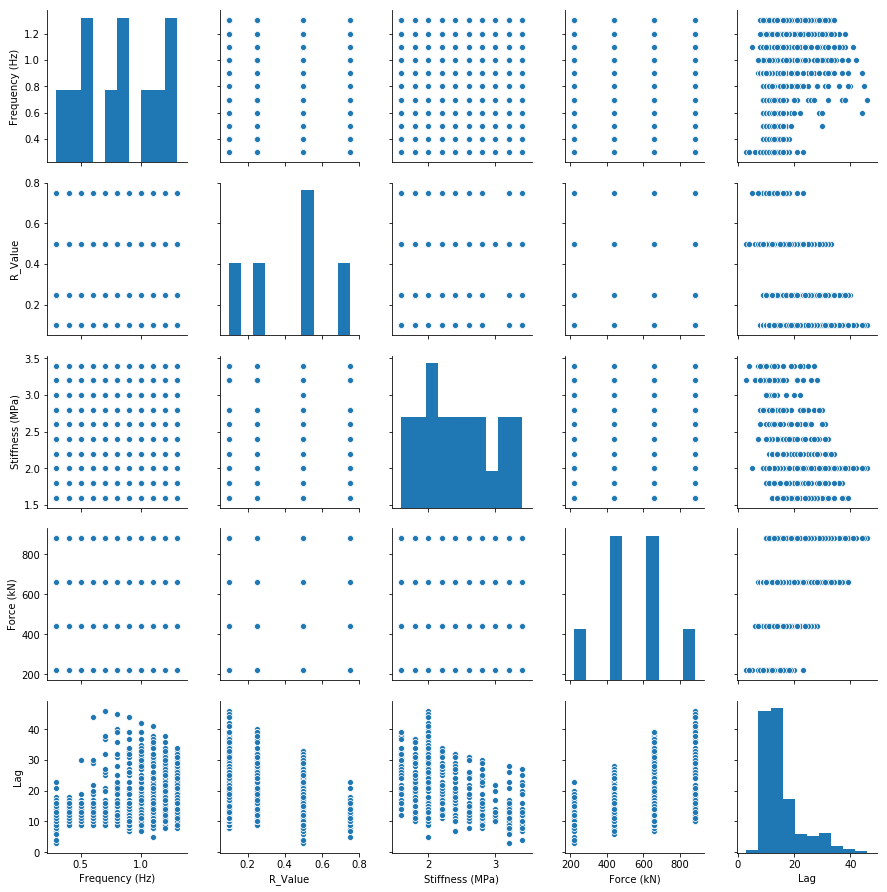

In [2]:
df=pd.read_csv(r"C:\Users\Public\MLinputs_Lag.csv")
pair_lag=sns.pairplot(df)
pair_lag.savefig("Report Pair Lag.png")

# ML Prep & Imports

In [9]:
from math import sqrt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor

In [10]:
X = df.drop(['Lag'],axis=1)
Y = pd.DataFrame(df.Lag)
processed_X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(processed_X, Y, test_size=0.2, random_state=42)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import numpy as np
ravelled_y_train=np.ravel(y_train['Lag'])

# Support Vector Regression

In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [13]:
clf = GridSearchCV(SVR(), 
    {'gamma':[0.5,1,2],
     'epsilon':[0.01, 0.1,1],
     'C': [15,20,25],
    'kernel': ['rbf']}, 
    return_train_score=False)
clf.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.5, 1, 2], 'epsilon': [0.01, 0.1, 1], 'C': [15, 20, 25], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [14]:
df = pd.DataFrame(clf.cv_results_)
df = df[df['mean_test_score']  >= 0.95]  
df[['param_C','param_epsilon','param_gamma','param_kernel','mean_test_score']]

,param_C,param_epsilon,param_gamma,param_kernel,mean_test_score
1,15,0.01,1,rbf,0.950679
4,15,0.1,1,rbf,0.950958
10,20,0.01,1,rbf,0.951051
13,20,0.1,1,rbf,0.951501
19,25,0.01,1,rbf,0.950787
22,25,0.1,1,rbf,0.950861


In [15]:
print(clf.best_params_)

{'C': 20, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [16]:
svr_model = SVR(C=20, epsilon=0.01,gamma=1,kernel='rbf')
svr_model.fit(X_train,ravelled_y_train)
svr_model.score(X_test, y_test)

0.9611944803374382

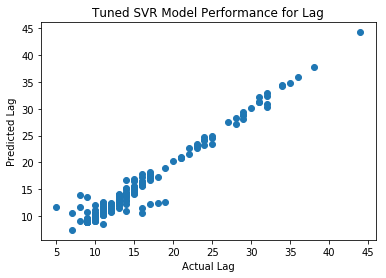

In [17]:
svr_predictions=svr_model.predict(X_test)
plt.scatter(y_test, svr_predictions)
plt.xlabel('Actual Lag')
plt.ylabel('Predicted Lag')
plt.title('Tuned SVR Model Performance for Lag')
plt.savefig('Report ML Lag SVR Performance.png')

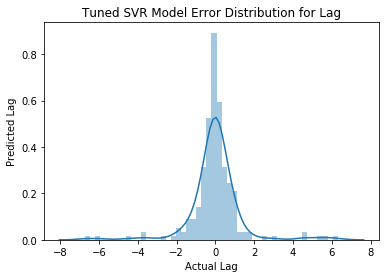

In [18]:
difference = []

for i in range(0,220):
    difference.append(y_test.values[i][0]-svr_predictions[i])
    
sns.distplot(difference)
plt.xlabel('Actual Lag')
plt.ylabel('Predicted Lag')
plt.title('Tuned SVR Model Error Distribution for Lag')
plt.savefig('Report ML Lag SVR Error.png')

In [19]:
print('Mean Absolute Error is {}'.format(mean_absolute_error(y_test, svr_predictions)))
print('Root Mean Squared Error is {}'.format(sqrt(mean_squared_error(y_test, svr_predictions))))
print('R^2 is {}'.format(r2_score(y_test, svr_predictions)))
print('Explained Regression Variance is {}'.format(explained_variance_score(y_test, svr_predictions)))

Mean Absolute Error is 0.7117971854731492
Root Mean Squared Error is 1.3162564166306407
R^2 is 0.9611944803374383
Explained Regression Variance is 0.961198288288342


# Gaussian Process Regression

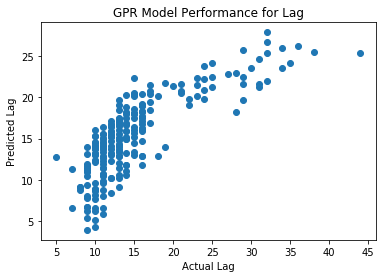

In [20]:
kernel = RBF() + DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,normalize_y= False).fit(X_train, y_train)
gpr.score(X_train, y_train)

predictions_gauss, sigma=gpr.predict(X_test, return_std=True)

plt.scatter(y_test,predictions_gauss)
plt.xlabel('Actual Lag')
plt.ylabel('Predicted Lag')
plt.title('GPR Model Performance for Lag')
plt.savefig('Report ML Lag GPR Performance.png')

In [21]:
print('Mean Absolute Error is {}'.format(mean_absolute_error(y_test, predictions_gauss)))
print('Root Mean Squared Error is {}'.format(sqrt(mean_squared_error(y_test, predictions_gauss))))
print('R^2 is {}'.format(r2_score(y_test, predictions_gauss)))
print('Explained Regression Variance is {}'.format(explained_variance_score(y_test, predictions_gauss)))

Mean Absolute Error is 3.2082554282979676
Root Mean Squared Error is 4.066809216795748
R^2 is 0.6295581032261978
Explained Regression Variance is 0.6314095157695445


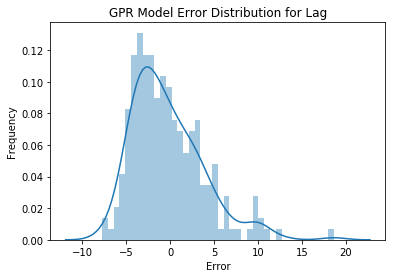

In [22]:
sns.distplot((y_test-predictions_gauss), bins = 40);
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('GPR Model Error Distribution for Lag')
plt.savefig('Report ML Lag GPR Error.png')

# Linear Regression Model

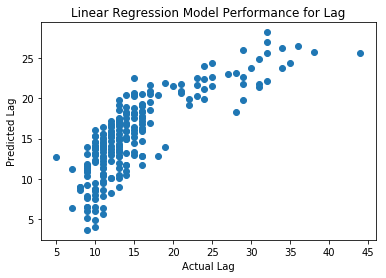

In [25]:
lm=LinearRegression(normalize=True)
lm.fit(X_train,y_train)
lm_predictions=lm.predict(X_test)
plt.scatter(y_test,lm_predictions)
plt.xlabel('Actual Lag')
plt.ylabel('Predicted Lag')
plt.title('Linear Regression Model Performance for Lag')
plt.savefig('Report ML Lag Linear Performance.png')

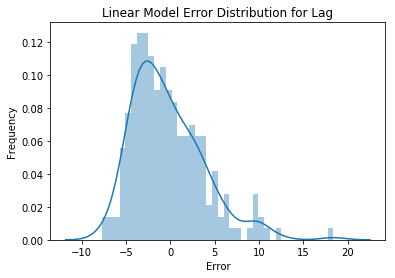

In [26]:
sns.distplot((y_test-lm_predictions), bins = 40);
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Linear Model Error Distribution for Lag')
plt.savefig('Report ML Lag Linear Model Error.png')

In [27]:
print('Mean Absolute Error is {}'.format(mean_absolute_error(y_test, lm_predictions)))
print('Root Mean Squared Error is {}'.format(sqrt(mean_squared_error(y_test, lm_predictions))))
print('R^2 is {}'.format(r2_score(y_test, lm_predictions)))
print('Explained Regression Variance is {}'.format(explained_variance_score(y_test, lm_predictions)))

Mean Absolute Error is 3.2161221701957534
Root Mean Squared Error is 4.057195041970552
R^2 is 0.6313075255273048
Explained Regression Variance is 0.6332338389325812
